In [1]:
import sys

import random
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.common as uc

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2019-03-18 14:10:13,901: get_random_city.py: 58:
	881 edges
	157 one-way
	362 two-way


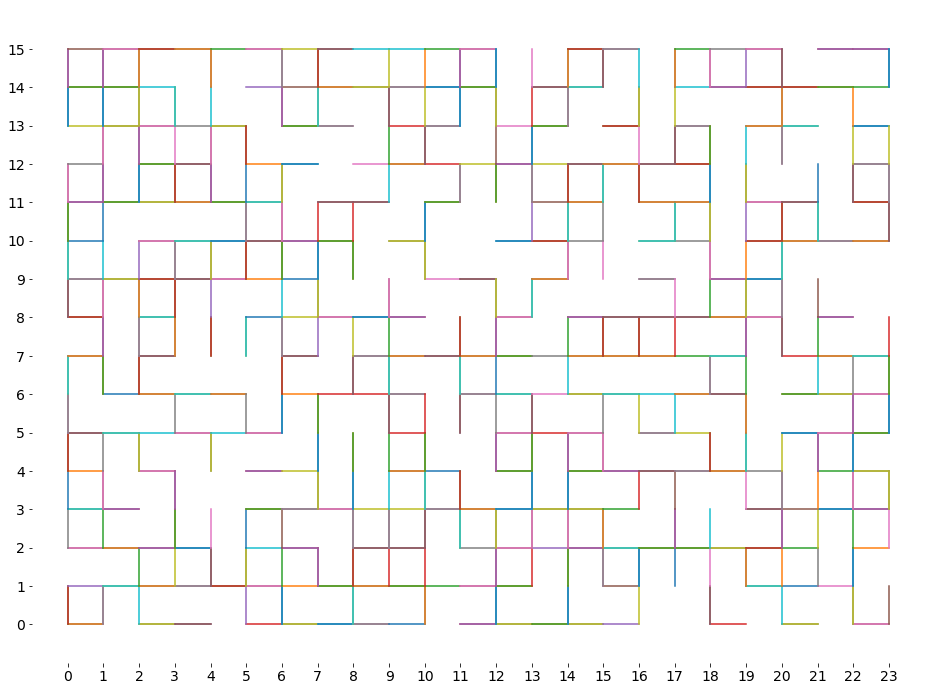

In [2]:
random_city = grc.get_random_city(
    city_size=[24, 16],
    frequencies=[0.3, 0.1, 0.1, 0.5]
#     city_size=[3, 3],
#     frequencies=[0., 0., 0., 1.]
    )
grc.plot_area(random_city)

INFO: 2019-03-18 14:10:17,866: visualise_graph.py: 87:
	18 dead ends
	50 disconnected nodes


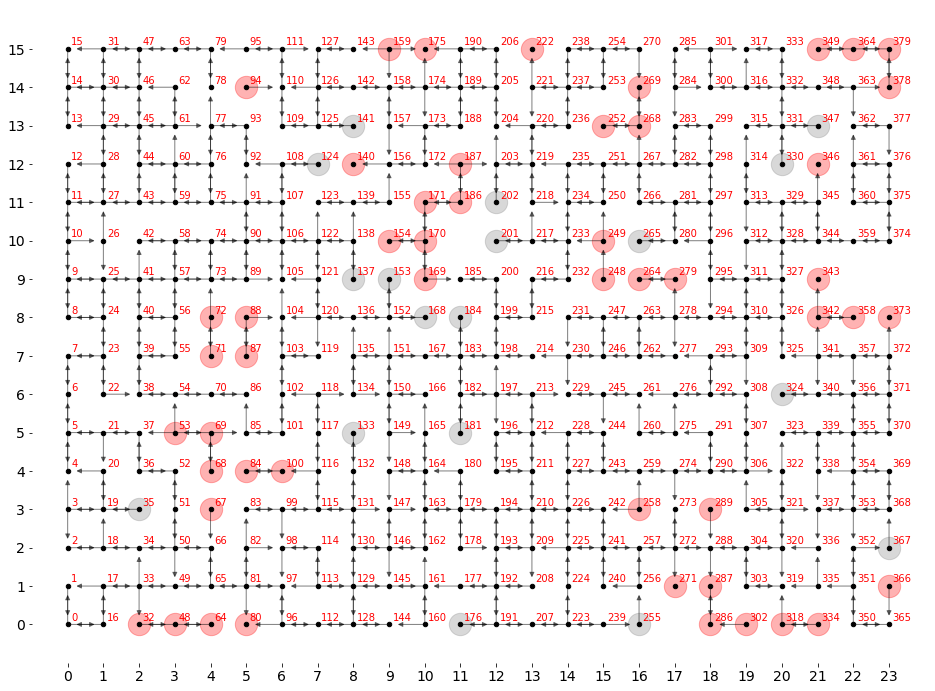

In [3]:
sg = gg.get_simple_graph(random_city)
vg.visualise_simple_graph(sg)

In [ ]:
# fg.get_splitting_nodes(sg)

INFO: 2019-03-18 14:10:27,904: visualise_graph.py: 184:
	strongly connected: True
	disconnected nodes: 0
	straight drives: 1263
	right turns: 461
	left turns: 474
	u-turns: 682
	dead ends: 52


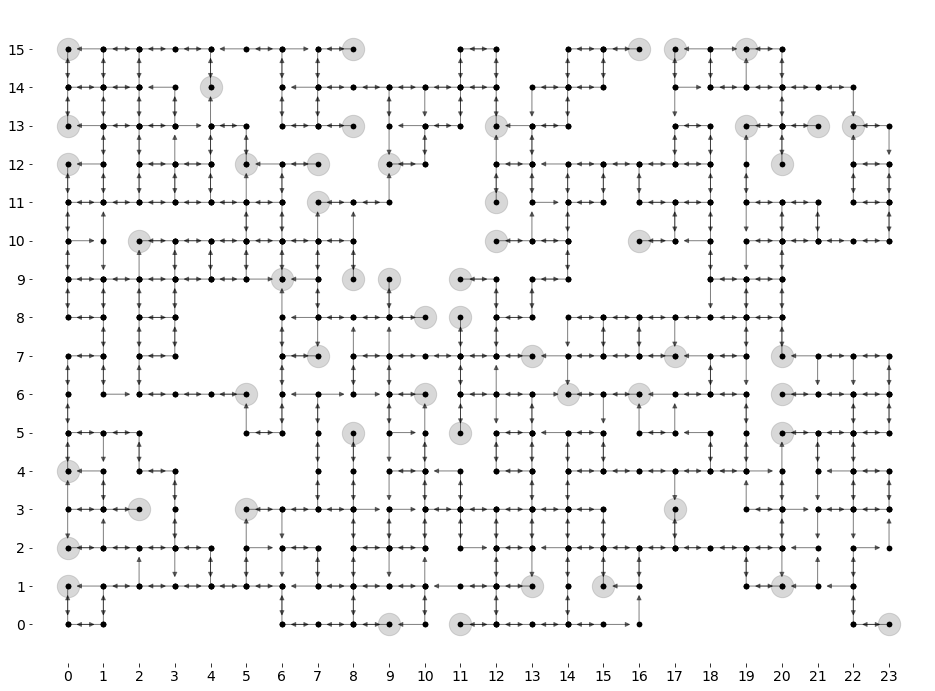

1598
2880


In [4]:
mg = gg.get_manoeuvre_graph(random_city)
vg.visualise_manoeuvre_graph(mg)
print(len(mg.nodes()))
print(len(mg.edges()))
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

In [5]:
mg = fg.join_split_edges(mg)
vg.visualise_manoeuvre_graph(mg)

IndexError: list index out of range

In [ ]:
# splitting_nodes = []
# for n in mg.nodes():
#     if ((len(mg.in_edges(n))==1)
#         and (len(mg.out_edges(n))==1)):
#         segment_i = mg.get_edge_data(*list(mg.in_edges(n))[0])
#         segment_j = mg.get_edge_data(*list(mg.out_edges(n))[0])
#         if ((segment_i['manoeuvre'] == 'go_straight')
#             and (segment_j['manoeuvre'] == 'go_straight')):
#             splitting_nodes.append(n)
# print(splitting_nodes)

INFO: 2019-03-18 14:10:45,144: get_graph.py: 197:
district borders:
west-east: 7 - 19
south-north: 1 - 9
INFO: 2019-03-18 14:10:45,156: visualise_graph.py: 184:
	strongly connected: False
	disconnected nodes: 67
	straight drives: 421
	right turns: 159
	left turns: 165
	u-turns: 230
	dead ends: 14


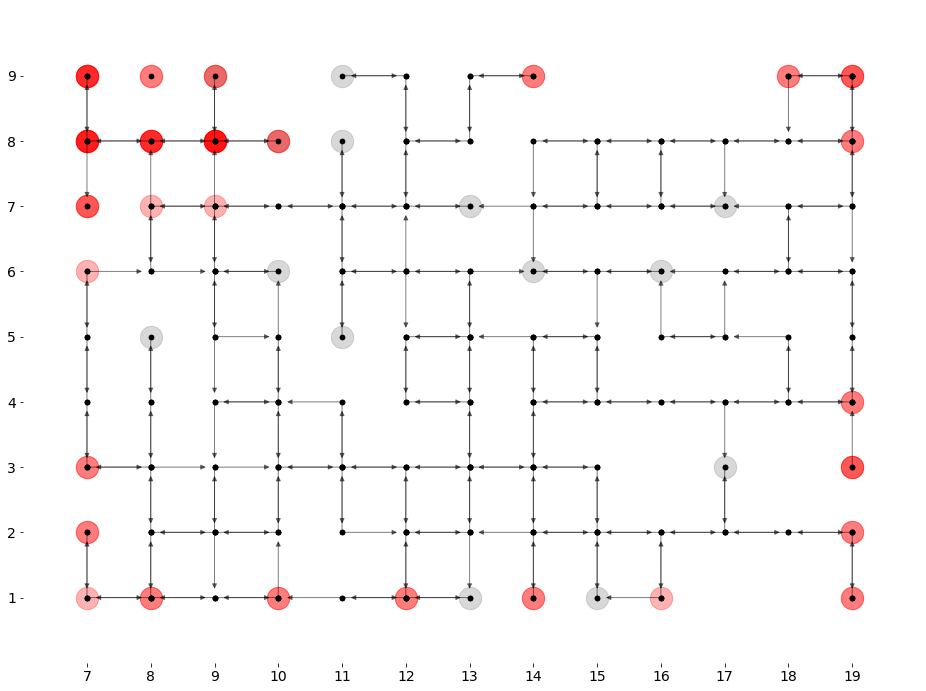

In [6]:
dg = gg.get_random_district_graph(mg)
vg.visualise_manoeuvre_graph(dg)

INFO: 2019-03-18 14:11:00,165: visualise_graph.py: 184:
	strongly connected: False
	disconnected nodes: 41
	straight drives: 456
	right turns: 165
	left turns: 173
	u-turns: 230
	dead ends: 14


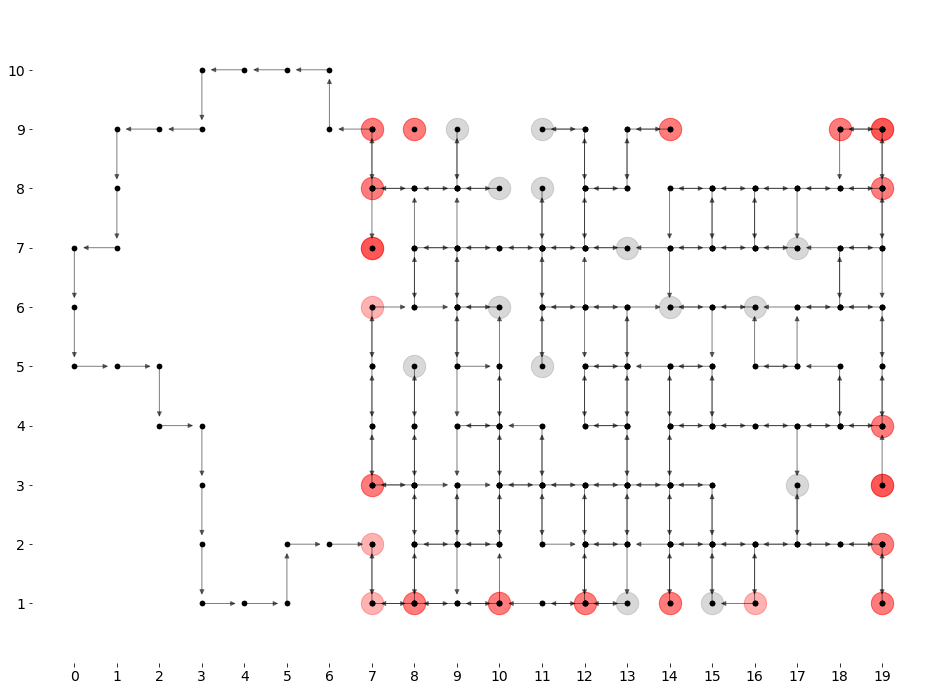

In [7]:
dg = fg.add_connecting_grafts(dg, mg)
vg.visualise_manoeuvre_graph(dg)

INFO: 2019-03-18 14:11:30,782: visualise_graph.py: 184:
	strongly connected: True
	disconnected nodes: 0
	straight drives: 464
	right turns: 461
	left turns: 474
	u-turns: 682
	dead ends: 2


799
2081


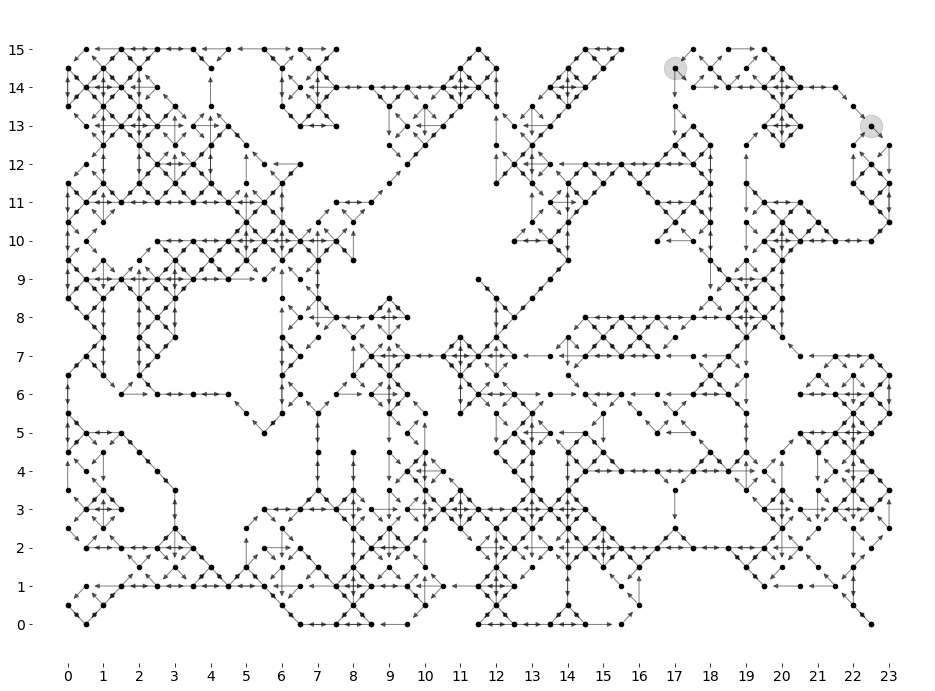

In [8]:
icg = gg.get_inverted_graph(random_city)
print(len(icg.nodes()))
print(len(icg.edges()))
vg.visualise_manoeuvre_graph(icg)
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

INFO: 2019-03-18 14:11:41,804: get_graph.py: 197:
district borders:
west-east: 6 - 18
south-north: 8 - 16
INFO: 2019-03-18 14:11:41,809: visualise_graph.py: 184:
	strongly connected: False
	disconnected nodes: 101
	straight drives: 87
	right turns: 93
	left turns: 94
	u-turns: 162
	dead ends: 2


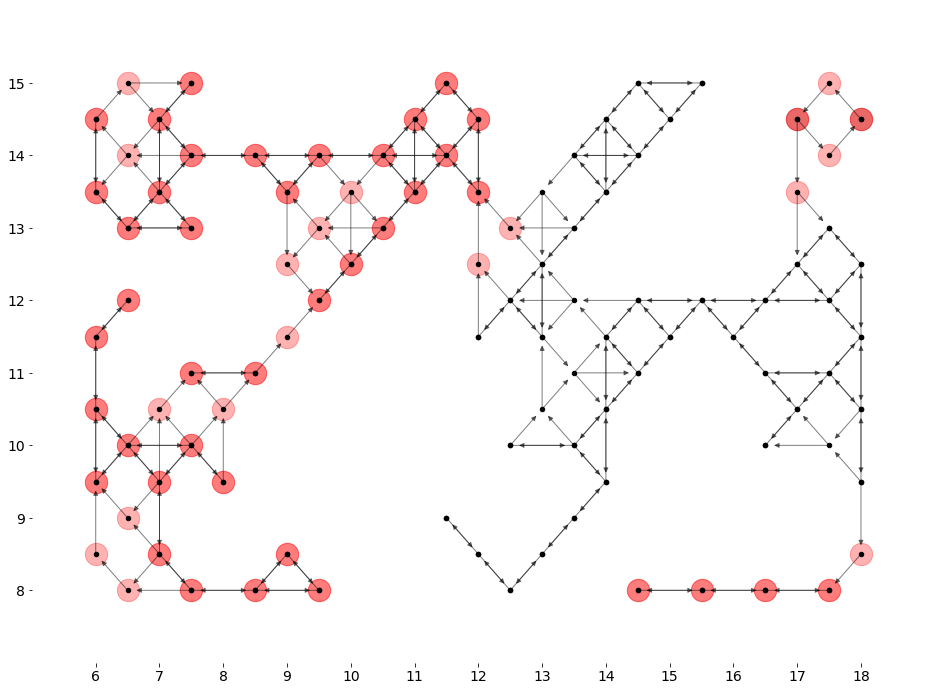

In [9]:
idg = gg.get_random_district_graph(icg)
vg.visualise_manoeuvre_graph(idg)

INFO: 2019-03-18 14:11:47,912: visualise_graph.py: 184:
	strongly connected: False
	disconnected nodes: 120
	straight drives: 97
	right turns: 97
	left turns: 98
	u-turns: 162
	dead ends: 2


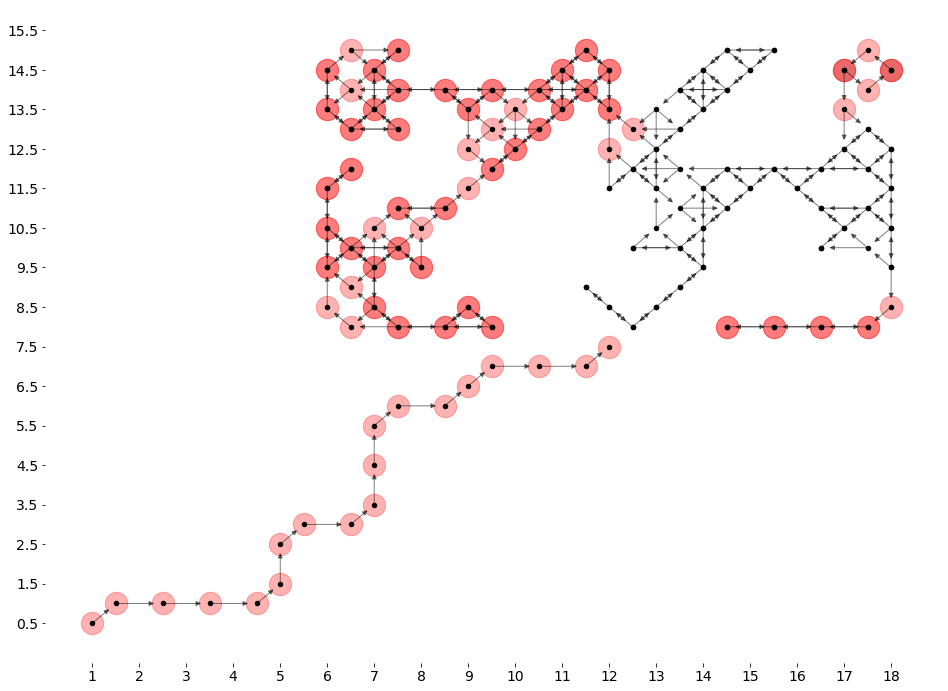

In [10]:
idg = fg.add_connecting_grafts(idg, icg)
vg.visualise_manoeuvre_graph(idg)

In [ ]:
nx.is_strongly_connected(ig)

In [ ]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [ ]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

In [ ]:
vis_g.visualise_graph(inverted_graph)

In [ ]:
import geopandas as gpd

In [ ]:
np.arange(0.5, 17.6 + 1.0, 1)

In [ ]:
[-1, 5] > [0, 1]